# Graficas señales en los dominios de tiempo y frecuencia

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal as sp

from scipy import fft, arange

from ipywidgets import Button, Label, Dropdown, Text, IntText, FloatText, Layout, Box,Textarea
from IPython.display import display
from IPython.display import clear_output

from sympy import *
from sympy.abc import t, n

import math 


#SERIES DE FOURIER


#Variables de entrada

At = IntText(description='')
Pt = IntText(description='')
Nt = IntText(description='')
B1 = Button(description='Aplicar', button_style='success')
B2 = Button(description='Graficar', button_style='success')

Opciones =['','Rectangular periódica','Rampa de pendiente negativa', 'Triangular', 'Exponencial','Sinusoidal rectificada']
drop1 = Dropdown(options=Opciones)

Opciones2 =['','Reconstruccion de la señal', 'Espectro amplitud', 'Espectro Esp_amplitud', 'Señal original']
drop2 = Dropdown(options=Opciones2)

#Interfaz
form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)
form_items = [
    Box([Label(value='Tipo de grafica:'),
         drop1], layout=form_item_layout),
    Box([Label(value='Amplitud:'),
         At], layout=form_item_layout),
    Box([Label(value='Periodo:'),
         Pt], layout=form_item_layout),
    Box([Label(value='Numero de armonicos:'),
         Nt], layout=form_item_layout),
   
]
form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))

form_items_2 = [
    Box([Label(value='Tipo de grafica:'),
         drop2], layout=form_item_layout),
]
form_2 = Box(form_items_2, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))

#Calculo de los coeficientes
def Coef(b):
    clear_output(wait=True)
    display(form_2, B2)
        
    global Am, Per, Arm, Ann, Bnn, Esp_amplitud, Fase, Arm_eje, TV, serie, y
    
    Am = At.value   
    Per = Pt.value 
    Arm = Nt.value  
    
    Ann = np.zeros([Arm,1])
    Bnn = np.zeros([Arm,1])
    Fase = np.zeros([Arm,1])
    Esp_amplitud = np.zeros([Arm,1])
    Arm_eje = np.arange(1,Arm+1)
    TV = np.arange(-Per,Per,Per/100)
    
    
    if Opciones[1] == drop1.value:
        
        a0 = integrate(Am/Per,(t,0,Per/2))

        an = integrate(((2*Am)/Per)*cos((2*n*pi*t)/Per),(t,0,Per/2))

        bn = integrate(((2*Am)/Per)*sin((2*n*pi*t)/Per),(t,0,Per/2))
        
        y = Am*(sp.square(2*(1/Per)*np.pi*TV) + 1)/2
        
    if Opciones[2] == drop1.value:
        
        a0 = 0

        an = integrate(((-4*Am*((t/Per)))/Per)*cos((2*n*pi*t)/Per),(t,0,Per))

        bn = integrate(((-4*Am*((t/Per)))/Per)*sin((2*n*pi*t)/Per),(t,0,Per))
        
        y = 2*Am*((-TV/Per)-1/2)*(np.piecewise(TV,TV>=-Per,[1,0])-np.piecewise(TV,TV>=0,[1,0])) + 2*Am*((-TV/Per)+1/2)*(np.piecewise(TV,TV>=0,[1,0])-np.piecewise(TV,TV>=Per,[1,0]))
        
    if Opciones[3] == drop1.value:   
        
        a0 = 0
        
        an = ((2*Am)/Per)*(4*integrate(-t*cos((2*n*pi*t)/Per)/Per,(t, -Per/2, 0)) + 4*integrate(t*cos((2*n*pi*t)/Per)/Per,(t,0,Per/2)) + integrate(cos((2*n*pi*t)),(t,-Per/2,Per/2)))

        bn = ((2*Am)/Per)*(4*integrate(-t*sin((2*n*pi*t)/Per)/Per,(t, -Per/2, 0)) + 4*integrate(t*sin((2*n*pi*t)/Per)/Per,(t,0,Per/2)) + integrate(sin((2*n*pi*t)),(t,-Per/2,Per/2)))

        y = Am*sp.sawtooth(2*TV*(1/Per)*np.pi,0.5) 
        
    if Opciones[4] == drop1.value: 
        
        k = 3
        
        a0 = integrate((Am*exp(((t/Per)-1)*k))/Per,(t,0,Per))
    
        an = integrate(((2*Am*exp(((t/Per)-1)*k))/Per)*cos((2*n*pi*t)/Per),(t,0,Per))

        bn = integrate(((2*Am*exp(((t/Per)-1)*k))/Per)*sin((2*n*pi*t)/Per),(t,0,Per))
        
        y = Am*np.exp((((TV+Per)/Per)-1)*k)*(np.piecewise(TV,TV>=-Per,[1,0])-np.piecewise(TV,TV>=0,[1,0])) + Am*np.exp(((TV/Per)-1)*k)*(np.piecewise(TV,TV>=0,[1,0])-np.piecewise(TV,TV>=Per,[1,0])) 
        
    if Opciones[5] == drop1.value: 
        
        a0 = integrate((Am*sin((2*pi*t)/Per))/Per,(t,0,Per/2)) - integrate((Am*sin((2*pi*t)/Per))/Per, (t,-Per/2,0))

        an = integrate(((2*Am*sin((2*pi*t)/Per))/Per)*cos((2*n*pi*t)/Per),(t,0,Per/2)) - integrate(((2*Am*sin((2*pi*t)/Per))/Per)*cos((2*n*pi*t)/Per),(t,-Per/2,0)) 

        bn = integrate(((2*Am*sin((2*pi*t)/Per))/Per)*sin((2*n*pi*t)/Per),(t,0,Per/2)) - integrate(((2*Am*sin((2*pi*t)/Per))/Per)*sin((2*n*pi*t)/Per),(t,-Per/2,0)) 
        
        y = Am*np.abs(np.sin(2*np.pi*(1/Per)*TV))
    
    serie = a0

    for i in range(1, Arm+1):
    
        Ann.put(i-1,an.subs(n,i))
        Bnn.put(i-1,bn.subs(n,i))
        Esp_amplitud.put(i-1,np.sqrt(pow(Ann[i-1],2)+pow(Bnn[i-1],2)))
        Fase.put(i-1,np.arctan(-Ann[i-1]/Bnn[i-1]))
    
        serie =  Ann[i-1]*np.cos((2*i*np.pi*TV)/Per) + Bnn[i-1]*np.sin((2*i*np.pi*TV)/Per) + serie

    clear_output(wait=True)
    display(form_2, B2)


def Dib(b):
    
    clear_output(wait=True)
    display(form_2, B2)
    
    if Opciones2[1] == drop2.value: 
        
        plt.plot(TV,serie)
           
    if Opciones2[2] == drop2.value: 
        
        plt.stem(Arm_eje,Esp_amplitud)
    
    if Opciones2[3] == drop2.value: 
       
        plt.stem(Arm_eje,Fase)
        
    if Opciones2[4] == drop2.value: 
        
        plt.plot(TV,y)
    
B1.on_click(Coef)
B2.on_click(Dib)

display(form,B1)


Box(children=(Box(children=(Label(value='Tipo de grafica:'), Dropdown(options=('', 'Rectangular periódica', 'R…

Button(button_style='success', description='Aplicar', style=ButtonStyle())

# TRANSFORMADA DE FOURIER

Box(children=(Box(children=(Label(value='Tipo de grafica:'), Dropdown(index=1, options=('', 'Dominio del tiemp…

Button(button_style='success', description='Graficar', style=ButtonStyle())

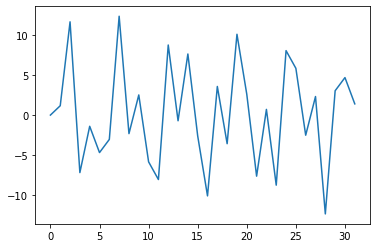

In [2]:



#Valiables de entrada
Am1 = IntText(description='')
Am2 = IntText(description='')
Am3 = IntText(description='')
Frec = IntText(description='')
Wa1 = IntText(description='')
Wa2 = IntText(description='')
Wa3 = IntText(description='')
muestras = IntText(description='')

Opciones4 =['','Dominio del tiempo', 'Dominio de la frecuencia']
drop4 = Dropdown(options=Opciones4)

B3 = Button(description='Graficar', button_style='success')
B4 = Button(description='Aplicar', button_style='success')

#Interfaz
form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items_3 = [
    Box([Label(value='Amplitud 1:'),
         Am1], layout=form_item_layout),
    Box([Label(value='Amplitud 2:'),
         Am2], layout=form_item_layout),
    Box([Label(value='Amplitud 3:'),
         Am3], layout=form_item_layout),
    Box([Label(value='Frecuencia W1'),
         Wa1], layout=form_item_layout),
    Box([Label(value='Frecuencia W2: '),
         Wa2], layout=form_item_layout),
    Box([Label(value='Frecuencia W3:'),
         Wa3], layout=form_item_layout),
    Box([Label(value='Numero de muestras:'),
         muestras], layout=form_item_layout),
    Box([Label(value='Frecuencia de muestreo:'),
         Frec], layout=form_item_layout),
]

form_3 = Box(form_items_3, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))

form_items_4 = [
    Box([Label(value='Tipo de grafica:'),
         drop4], layout=form_item_layout),
]
form_4 = Box(form_items_4, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))


def Transformada(b):
    
    global N
    global y
    global frq
    global Y, f1, sp_fft
 
    A1 = Am1.value  
    A2 = Am2.value   
    A3 = Am3.value 
    Fs = Frec.value 
    W1 = Wa1.value
    W2 = Wa2.value
    W3 = Wa3.value
    n = muestras.value  
    
    clear_output(wait=True)
    display(form_3,B4)
    display(form_4, B3)
    
    Ts= 1/Fs;
    N = np.arange(0,n,1)
  
    y=A1*np.sin(2*W1*np.pi*(N/Fs))+A2*np.sin(2*np.pi*W2*(N/Fs))+A3*np.sin(2*np.pi*W3*(N/Fs))

    M=len(y);
    
    Y=fft(y)
    
    sp_fft=np.absolute(np.fft.fftshift(Y))
    f1=np.arange(-0.5,0.5-(1/len(sp_fft))+1/len(sp_fft),1/len(sp_fft))*Fs
    
    clear_output(wait=True)
    display(form_3,B4)
    display(form_4, B3)
    
    
B4.on_click(Transformada)

def Dib_2(b):
    
    clear_output(wait=True)
    display(form_4, B3)
    
    if Opciones4[1] == drop4.value: 
        
        plt.plot(N,y)
    
    if Opciones4[2] == drop4.value: 
        
        plt.plot(f1,sp_fft)

        

B3.on_click(Dib_2)

display(form_3,B4)